# Introducción a Scikit-Learn para el módulo de Ciencia de Datos

En esta sesión, aprenderemos cómo utilizar scikit-learn para construir una pipeline de Machine Learning completa. Cubriremos los siguientes pasos:

1. Carga y Exploración de Datos
2. Preprocesamiento de Datos
  - Normalización de variables numéricas
  - Codificación de variables categóricas
3. Selección del Modelo y Loss Function
4. Evaluación del Modelo
  - RMSE para Regresión

Este código nos servirá como punto de partida para las prácticas del curso.

- Algunos de los conceptos de este código como One-Hot Encoding los estudiaremos durante el curso, así que no te preocupes por no entenderlo todo hoy.
- Céntrate en entender el objeto principal del código, `Pipeline` y los métodos más importantes `fit` y `predict`.

## ¿Qué es una Pipeline?

Una Pipeline en scikit-learn es una herramienta que permite encadenar múltiples pasos de procesamiento y modelado en un solo objeto

Una Pipeline está compuesta por una secuencia de pasos, donde cada paso es un transformador que implementa los métodos .fit() y .transform(). El último paso es un estimador que implementa el método .fit() (como un modelo de Machine Learning).



En un proyecto de Machine Learning, tenemos varios pasos encadenados y pueden volverse bastante complejos. Las pipelines nos permiten empaquetar el proceso en pocas líneas de código para:

*   Estructurar sus proyectos de manera más limpia y organizada.
*   Asegurar la consistencia en el preprocesamiento de datos.
*   Facilitar la búsqueda de hiperparámetros y la validación cruzada
*   Prevenir errores comunes como la fuga de datos.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

En este ejemplo:

- 'scaler': una función de preprocesado que transforma nuestros datos.
- 'classifier': Un modelo de regresión logística que se entrenará con los datos preprocesados.

Una vez tenemos nuestra pipeline preparada, el método `.fit` entrena el modelo, aplicando todos los pasos definidos en la pipeline. Una vez el modelo esté entrenado, usamos el método `.predict` para generar predicciones sobre nuevos datos.

Veámoslo en acción con un ejemplo

## Carga y Exploración de Datos

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [ ]:
from sklearn.datasets import fetch_california_housing

# Cargar el conjunto de datos California Housing
housing = fetch_california_housing()

x_reg = pd.DataFrame(housing.data, columns=housing.feature_names)
y_reg = pd.Series(housing.target)

# Mostrar las primeras filas
display(x_reg.head())
display(y_reg.head())


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


,0
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


## Preprocesamiento de Datos

El preprocesamiento es una etapa crucial que implica preparar los datos para que sean adecuados para el modelo. En este módulo vamos a hacer un preprocesamiento básico:

*   Variables numéricas: normalización
*   Variables categóricas: codificación con One-Hot-Encoding

In [ ]:
# Primero, identificamos qué variables son numéricas y cuáles categóricas
numeric_features_reg = x_reg.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features_reg = x_reg.select_dtypes(include=['object', 'category']).columns.tolist()

In [ ]:
print(numeric_features_reg)
print(categorical_features_reg)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
[]


### Definir Preprocesadores

In [ ]:
# Preprocesador para Regresión
numeric_transformer_reg = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer_reg = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor_reg = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_reg, numeric_features_reg),
        ('cat', categorical_transformer_reg, categorical_features_reg)
    ])


## Selección del Modelo y Función de Pérdida

Dependiendo del problema (regresión o clasificación), seleccionaremos un modelo apropiado y definiremos su función de pérdida.

### Modelos para Regresión

- Regresión Lineal: Minimiza el error cuadrático medio (MSE).

### Modelos para Clasificación

- Regresión Logística: Minimiza la entropía cruzada.
- K-Nearest Neighbors Classifier (KNN Classifier): Minimiza la distancia entre las predicciones y las clases reales.


## Entrenamiento

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y test
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(x_reg, y_reg, test_size=0.2, random_state=42)

# Verificar el tamaño de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {X_train_reg.shape}")
print(f"Tamaño del conjunto de test: {X_test_reg.shape}")

# Definir el pipeline para regresión con regresión polinómica
pipeline_reg = Pipeline(steps=[
    ('preprocessor', preprocessor_reg),
    ('regressor', LinearRegression())
])

# Entrenar el modelo
pipeline_reg.fit(X_train_reg, y_train_reg)

Tamaño del conjunto de entrenamiento: (16512, 8)
Tamaño del conjunto de test: (4128, 8)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['MedInc', 'HouseAge',
                                                   'AveRooms', 'AveBedrms',
                                                   'Population', 'AveOccup',
                                                   'Latitude', 'Longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('regressor', LinearRegression())])

## Evaluación del Modelo

### Evaluación para Regresión

In [ ]:
# Predecir en el conjunto de test
y_pred_reg = pipeline_reg.predict(X_test_reg)
print(y_pred_reg)
print(len(y_pred_reg))

[0.71912284 1.76401657 2.70965883 ... 4.46877017 1.18751119 2.00940251]
4128


In [ ]:
# Calcular el error
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
print(f"RMSE en el conjunto de test: {rmse:.2f}")


0.5558915986952442

### Inspección de las predicciones

In [ ]:
# Mostrar algunas predicciones junto con los valores reales
results = pd.DataFrame({'Actual': y_test_reg, 'Predicted': y_pred_reg})
print(results.head(10))


,Actual,Predicted
20046,0.47700,0.719123
3024,0.45800,1.764017
15663,5.00001,2.709659
20484,2.18600,2.838926
9814,2.78000,2.604657
13311,1.58700,2.011754
7113,1.98200,2.645500
7668,1.57500,2.168755
18246,3.40000,2.740746
5723,4.46600,3.915615


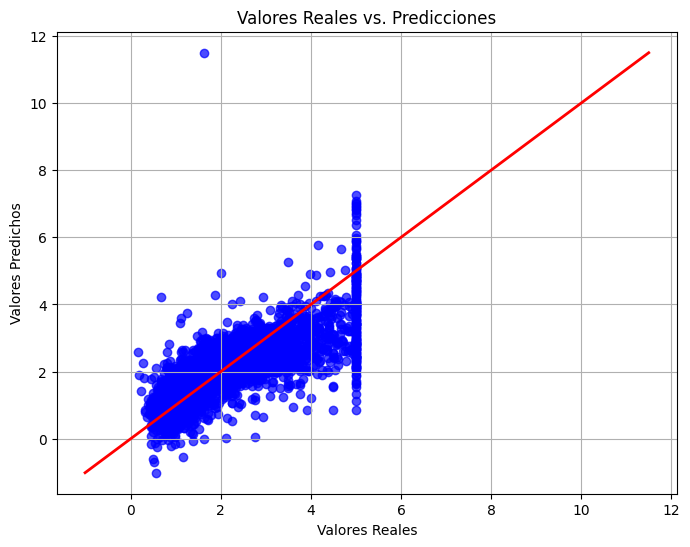

In [ ]:
import matplotlib.pyplot as plt

# Gráfico de dispersión
plt.figure(figsize=(8,6))
plt.scatter(results['Actual'], results['Predicted'], alpha=0.7, color='blue')
plt.plot([results.min().min(), results.max().max()], [results.min().min(), results.max().max()], color='red', linewidth=2)
plt.title('Valores Reales vs. Predicciones')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.grid(True)
plt.show()
